In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

pd.read_csv("/content/Chemical Composion of Ceramic.csv")
data=pd.read_csv("/content/Chemical Composion of Ceramic.csv")

In [ ]:
data

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,DY-M-3-g,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,DY-QC-1-g,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,DY-QC-2-g,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,DY-QC-3-g,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
data = data.fillna(data.mean())

<ipython-input-4-369509bb1069>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [ ]:
data.drop("Ceramic Name", axis=1, inplace=True)

In [ ]:
features=data.copy()
features

,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
#features.drop("Ceramic Name", axis=1, inplace=True)

In [ ]:
features

,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Glaze,0.34,0.55,12.37,70.70,5.33,8.06,0.06,1.61,1250,10,90,30,250,520,30,140,690
84,Glaze,0.72,0.34,12.20,72.19,6.19,6.06,0.04,1.27,1700,60,110,10,270,540,40,120,630
85,Glaze,0.23,0.24,12.99,71.81,5.25,7.15,0.05,1.29,750,40,100,0,240,470,40,120,480
86,Glaze,0.14,0.46,12.62,69.16,4.34,11.03,0.05,1.20,920,40,90,20,230,470,40,130,1100


In [ ]:
features.drop("Part", axis=1, inplace=True)

Создаем модель кластеризации методом K-means и обучаем её на подготовленных данных.
1)Создание объекта модели KMeans с указанием количества кластеров (n_clusters=2). В данном случае, модель будет разделять данные на 2 кластера.
2)Обучение модели KMeans на подготовленных данных (features). Этот шаг приводит к разделению данных на 2 кластера на основе их признаков.

Теперь модель KMeans обучена и может использоваться для прогнозирования кластера для новых данных или для дальнейшего анализа распределения данных по кластерам.

In [ ]:
model = KMeans(n_clusters=2)
model.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Получаем метки кластеров для каждой точки данных после применения модели KMeans.

model.labels_ - это атрибут модели KMeans, который содержит метки кластеров для каждой точки данных из обученного набора. Этот код сохраняет эти метки в переменной cluster_labels.

Полученные cluster_labels представляют собой массив, где каждое значение соответствует метке кластера для каждой точки данных из ваших исходных данных. Это позволяет присвоить каждой точке соответствующий кластер, который был ей назначен в результате работы модели KMeans.

In [ ]:
cluster_labels = model.labels_
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int32)

Отображаем результаты кластеризации на двухмерном пространстве с использованием метода главных компонент (PCA).

y_true = data['Part'] - создание переменной y_true, содержащей информацию о истинных кластерах.

pca = PCA(n_components=2) - инициализация объекта PCA для преобразования данных в двумерное пространство.

pca_result = pca.fit_transform(features) - применение PCA к признакам (features) для снижения размерности данных до двух главных компонент.

Создание графиков:

Первый график (subplot(1, 2, 1)) отображает исходные кластеры, используя информацию из y_true.
Второй график (subplot(1, 2, 2)) отображает предсказанные кластеры, которые были получены от модели KMeans и сохранены в cluster_labels.

Оба графика показывают точки данных в двумерном пространстве главных компонент. Они разделены цветами для каждого кластера. Цвета представляют разные кластеры, позволяя визуально сравнивать исходные кластеры (если они имеются) с кластерами, предсказанными моделью KMeans.






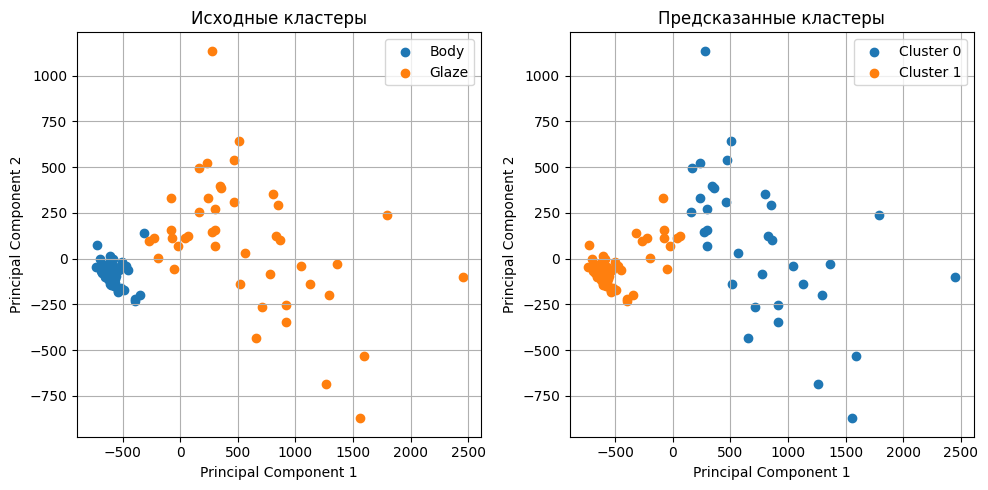

In [ ]:
y_true = data['Part']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
for cluster_name in y_true.unique():
    plt.scatter(pca_result[y_true == cluster_name, 0], pca_result[y_true == cluster_name, 1], label=cluster_name)
plt.title('Исходные кластеры')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
for cluster_label in range(max(cluster_labels) + 1):
    plt.scatter(pca_result[cluster_labels == cluster_label, 0], pca_result[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.title('Предсказанные кластеры')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Заменяем значения в столбцах 'Body' и 'Glaze' DataFrame'а data с использованием словаря replace_dict.

df = pd.DataFrame(data) - создает DataFrame df на основе data.

replace_dict = {'Body': 0, 'Glaze': 1} - создает словарь replace_dict, в котором ключи соответствуют значениям, которые нужно заменить, а значения - тем, на что нужно их заменить.

df = df.replace(replace_dict) - заменяет значения в DataFrame'е df в соответствии с заданным словарем replace_dict. Все значения 'Body' будут заменены на 0, а значения 'Glaze' будут заменены на 1.

In [ ]:
df = pd.DataFrame(data)
replace_dict = {'Body': 0, 'Glaze': 1}
df = df.replace(replace_dict)

Вычислим скорректированный индекс Рэнда (ARI) между истинными метками кластеров (y_true) и предсказанными метками кластеров (cluster_labels).

adjusted_rand_score - это метрика, используемая для оценки качества кластеризации, которая измеряет сходство между двумя наборами меток кластеров, учитывая случайное согласование меток.
y_true содержит истинные метки кластеров из исходных данных.
cluster_labels содержит предсказанные метки кластеров, полученные после выполнения кластеризации моделью KMeans.
Вычисление ARI позволяет понять, насколько хорошо модель справилась с кластеризацией, сравнивая предсказанные кластеры с истинными метками. Результат ARI находится в диапазоне от -1 до 1, где 1 означает идеальное согласование меток, 0 - случайное согласование, а отрицательные значения - согласование хуже случайного. Ближе к 1 - лучше.

Вычисление ari возвращает значение скорректированного индекса Рэнда (ARI) между истинными и предсказанными метками кластеров.

In [ ]:
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(y_true, cluster_labels)
ari

0.5926672909313548

Функция silhouette_score из библиотеки sklearn.metrics используется для вычисления среднего коэффициента силуэта по всем образцам. Она требует два параметра: набор данных (как правило, числовой массив, содержащий признаки) и метки кластеров, к которым относятся данные.

Функция ожидает, что параметр df содержит данные для образцов, но если df включает в себя как числовые, так и нечисловые данные, это может вызвать проблемы при вычислении коэффициента силуэта.

Для корректного вычисления коэффициента силуэта пользователь должен удостовериться, что переменная df содержит только числовые признаки, которые использовались для кластеризации.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, cluster_labels)
silhouette_avg

0.5840130285057593